In [ ]:
import cv2
from sklearn.cluster import KMeans
from skimage.feature import hog
import pickle
from scipy.spatial.distance import cdist
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn import svm
from skimage import feature
from skimage.color import rgb2gray
from skimage import color
import os
import shutil
import tensorflow as tf

In [ ]:
!gdown --id 1tbvC4gPzNxcV-tBsZ3cxkXrywvy0yUQG --folder

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1fB6XdcFpe3THV10xvi9Wn0X4gLMuFb6v test.zip
Processing file 1woEa8fLCyaDL5BtER0YD0JHYucufNj_5 train.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1fB6XdcFpe3THV10xvi9Wn0X4gLMuFb6v
To: /content/OPREC DATASET 2025/test.zip
100% 927k/927k [00:00<00:00, 42.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1woEa8fLCyaDL5BtER0YD0JHYucufNj_5
To: /content/OPREC DATASET 2025/train.zip
100% 7.56M/7.56M [00:00<00:00, 36.4MB/s]
Download completed


In [ ]:
!unzip -q '/content/OPREC DATASET 2025/train.zip' -d /content/Train
!unzip -q '/content/OPREC DATASET 2025/test.zip' -d /content/Test

In [ ]:
# Fungsi load data. Jangan diubah!
def load(folder):
    images = []
    labels = []
    class_names = os.listdir(folder)

    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(folder, class_name)
        if os.path.isdir(class_folder):
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    images.append(img)
                    labels.append(label)
    return images, labels

# Load Train

In [ ]:
# Load data train. Jangan diubah!
images, labels = load("/content/Train")
print(f"Loaded {len(images)} images with {len(set(labels))} classes.")

Loaded 1800 images with 36 classes.


## Feature extraction

In [ ]:
pip install --upgrade scikit-image


In [15]:
from skimage.feature import hog
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Pilih gambar untuk visualisasi
sample_image = images[0]

# Konversi gambar ke grayscale
gray = rgb2gray(sample_image)

# Hitung fitur HOG dan visualisasi
hog_features, hog_image = hog(
    gray,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    channel_axis=None
)

Extracted_data_train = feature_extraction(images)
print("Feature extraction completed!")


Feature extraction completed!


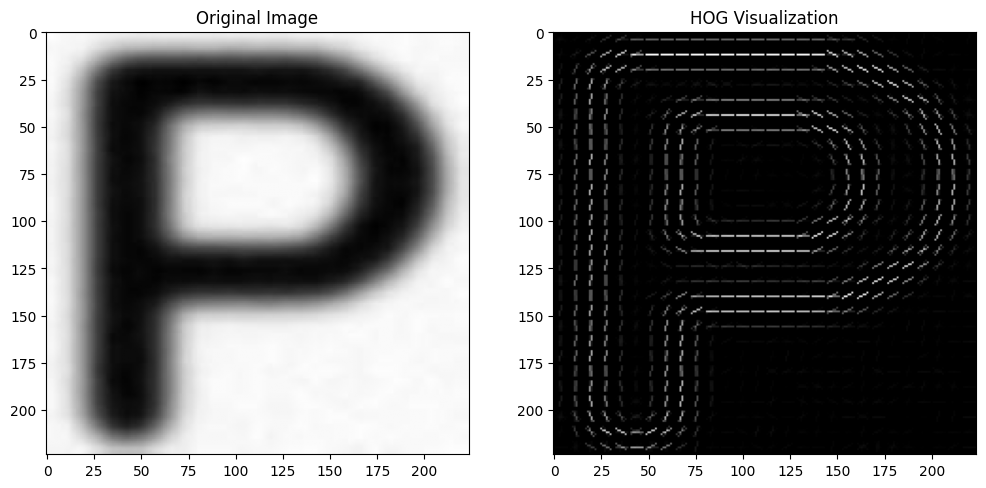

In [14]:
# Tampilkan gambar asli dan visualisasi HOG
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(hog_image, cmap='gray')
ax[1].set_title("HOG Visualization")
plt.show()

# Model Train

In [16]:
X_train = Extracted_data_train
Y_train = labels

In [18]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Normalisasi data training

# Membuat model SVM dengan parameter optimal
model_svm = svm.SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)

# Melatih model pada data training
model_svm.fit(X_train, Y_train)

print("SVM model has been successfully trained!")


SVM model has been successfully trained!


In [21]:
# Ekstraksi fitur dari data uji
X_test = feature_extraction(images)
print("Feature extraction completed!")

Feature extraction completed!


# Load Test

In [ ]:
# Load data test. Jangan diubah!
images, labels = load("/content/Test")
print(f"Loaded {len(images)} images with {len(set(labels))} classes.")

# Feature Extraction Data Test

In [29]:
from skimage.feature import hog
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Pilih gambar untuk visualisasi
sample_image = images[0]

# Konversi gambar ke grayscale
gray = rgb2gray(sample_image)

# Hitung fitur HOG dan visualisasi
hog_features, hog_image = hog(
    gray,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    channel_axis=None
)

Extracted_data_test = feature_extraction(images)
print("Feature extraction completed!")



Feature extraction completed!


In [30]:
X_test = Extracted_data_test
Y_test = labels

## Evaluation

In [34]:
# Use the trained SVM model to predict labels for the test dataset
y_pred = model_svm.predict(X_test)  # Use the test data features for prediction

# Evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)  # Compare true labels with predictions
f1 = f1_score(Y_test, y_pred, average='weighted')  # F1 score
precision = precision_score(Y_test, y_pred, average='weighted')  # Precision
recall = recall_score(Y_test, y_pred, average='weighted')  # Recall

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.5f}")
print(f"F1 Score: {f1:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall: {recall:.5f}")


Accuracy: 0.24889
F1 Score: 0.18660
Precision: 0.25524
Recall: 0.24889


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Print the classification report
print("CLASSIFICATION REPORT")
print(classification_report(Y_test, y_pred))  # Pass true and predicted labels


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.46      0.63        50
           1       0.00      0.00      0.00        50
           2       1.00      0.02      0.04        50
           3       0.00      0.00      0.00        50
           4       1.00      0.70      0.82        50
           5       1.00      0.84      0.91        50
           6       0.00      0.00      0.00        50
           7       0.84      0.98      0.91        50
           8       0.00      0.00      0.00        50
           9       0.71      1.00      0.83        50
          10       0.00      0.00      0.00        50
          11       0.16      1.00      0.28        50
          12       0.00      0.00      0.00        50
          13       0.00      0.00      0.00        50
          14       0.00      0.00      0.00        50
          15       0.00      0.00      0.00        50
          16       1.00      0.10      0.18        50
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


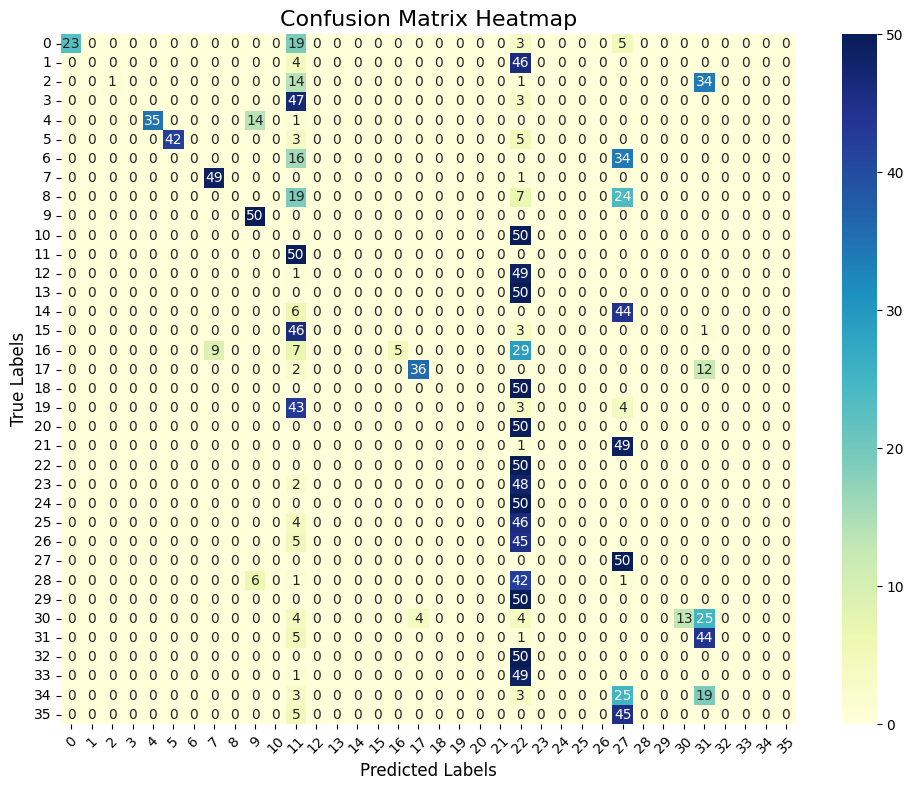

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Define class labels
class_labels = [str(i) for i in range(len(set(Y_test)))]  # Ganti dengan nama kelas jika ada

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix Heatmap", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


##Kesimpulan

Model bekerja cukup baik untuk sebagian besar kelas, terlihat dari banyaknya nilai di sepanjang diagonal (prediksi benar). Namun, ada beberapa kelas yang memiliki tingkat kesalahan lebih tinggi.

Ada beberapa kelas yang membingungkan model, di mana prediksi cenderung salah diarahkan ke kelas tertentu. Misalnya, pada label tertentu, ada pola salah klasifikasi ke label lain, meskipun jumlahnya tidak terlalu signifikan.


Beberapa kelas memiliki tingkat kesalahan lebih tinggi, kemungkinan karena kurangnya data pelatihan, pola fitur yang mirip antar kelas, atau kompleksitas dalam membedakan kelas tertentu.

*Muthia Rihadatul Aisyi*

*1301223248*